In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
img = cv2.imread('./Lenna.jpg')[...,::-1]

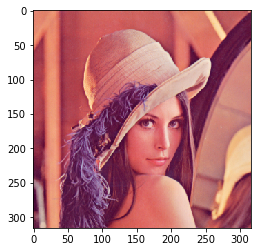

In [3]:
plt.imshow(img)

In [4]:
def gen_noise(x, std=1):
    while True:
        noise = np.random.randn(*x)*std
        yield noise

In [5]:
nG = gen_noise(img.shape, std=50)

True

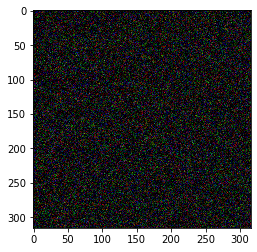

In [6]:
noise = next(nG)
noise_p = np.clip(np.round(noise), 0, 255).astype(np.uint8)
plt.imshow(noise_p)
cv2.imwrite('noise.png', noise_p[:,:,::-1])

True

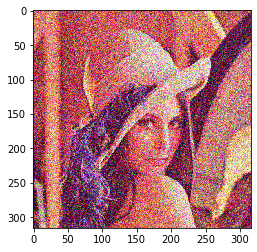

In [7]:
img_noisy = np.clip(np.round(img.astype(np.float32)+noise), 0, 255).astype(np.uint8)
plt.imshow(img_noisy)
cv2.imwrite('noisy.png', img_noisy[...,::-1])

In [8]:
K = 2000
img_denoised = img.astype(np.float32)
for _ in range(K):
    n = next(nG) / float(K)
    img_denoised = img_denoised + n
img_denoised = np.clip(np.round(img_denoised), 0, 255).astype(np.uint8)

True

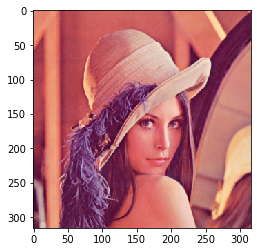

In [9]:
plt.imshow(img_denoised)
cv2.imwrite('denoised.png', img_denoised[...,::-1])

In [10]:
residual = np.abs(img_denoised.astype(np.int32)-img.astype(np.int32)).astype(np.uint8)

True

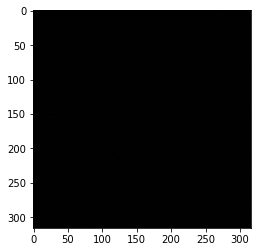

In [11]:
plt.imshow(residual)
cv2.imwrite('residual.png', residual)

In [12]:
residual.max()

5

In [13]:
cv2.imwrite('fig.png', np.concatenate((img, noise_p, img_noisy, img_denoised, residual), axis=1)[:,:,::-1])

True